In [0]:
import pandas as pd

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# data = pd.read_csv("/home/subhash/8th Sem/major project/dataset/KDDTrain+.csv")
# data_test = pd.read_csv("/home/subhash/8th Sem/major project/dataset/KDDTest+.csv")
data = pd.read_csv("/content/drive/My Drive/KDDTrain+.csv")
data_test = pd.read_csv("/content/drive/My Drive/KDDTest+.csv")

In [38]:
print(data.shape)
print(data_test.shape)

(125973, 42)
(22544, 42)


In [39]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [40]:
data_test.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [41]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [42]:
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [43]:
print(data['class'].value_counts())

normal     67343
anomaly    58630
Name: class, dtype: int64


In [44]:
print(data_test['class'].value_counts())

anomaly    12833
normal      9711
Name: class, dtype: int64


In [0]:
data["class"] = data["class"].replace({'normal': 0 , 'anomaly' : 1})

In [46]:
data["class"].head()

0    0
1    0
2    1
3    0
4    0
Name: class, dtype: int64

In [0]:
data_test["class"] = data_test["class"].replace({'normal': 0 , 'anomaly' : 1})

In [48]:
data_test["class"].head()

0    1
1    1
2    0
3    1
4    1
Name: class, dtype: int64

In [49]:
for col_name in data.columns:
    if data[col_name].dtype == 'object':
        unique_cat = len(data[col_name].unique())
        print('Feature {col_name} has {unique_cat} categories'.format(col_name=col_name,unique_cat=unique_cat))

print('\nCategories in service\n')
print(data['service'].value_counts().head())

Feature protocol_type has 3 categories
Feature service has 70 categories
Feature flag has 11 categories

Categories in service

http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: service, dtype: int64


In [50]:
for col_name in data_test.columns:
    if data_test[col_name].dtypes == 'object' :
        unique_cat = len(data_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print('\nCategories in service\n')
print(data_test['service'].value_counts().head())

Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories

Categories in service

http       7853
private    4774
telnet     1626
pop_3      1019
smtp        934
Name: service, dtype: int64


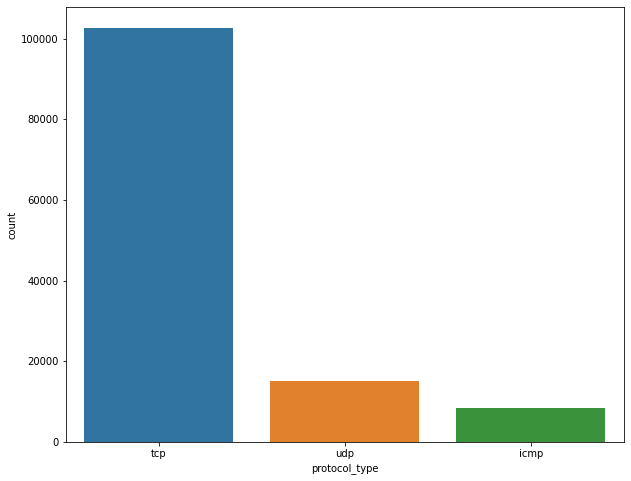

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.countplot(x="protocol_type", data=data)
plt.show()

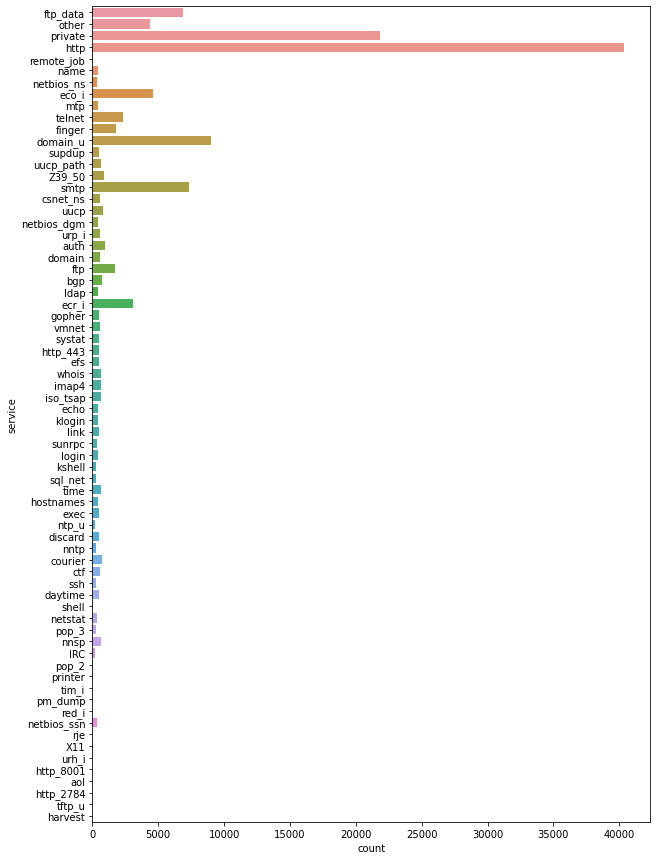

In [52]:
plt.figure(figsize=(10,15))
sns.countplot(y="service", data=data)
plt.show()

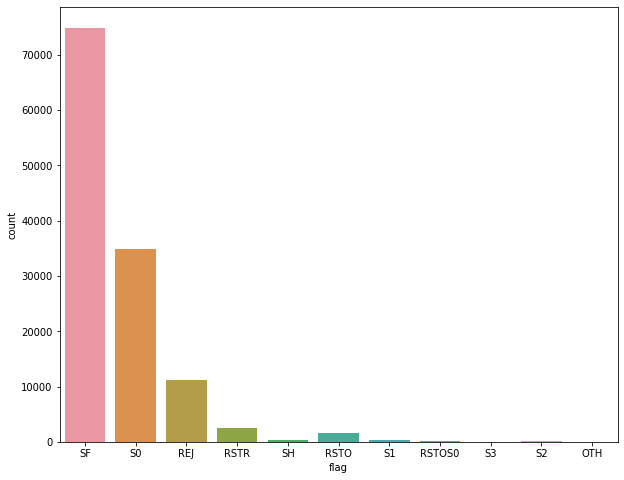

In [53]:
plt.figure(figsize=(10,8))
sns.countplot(x="flag", data=data)
plt.show()

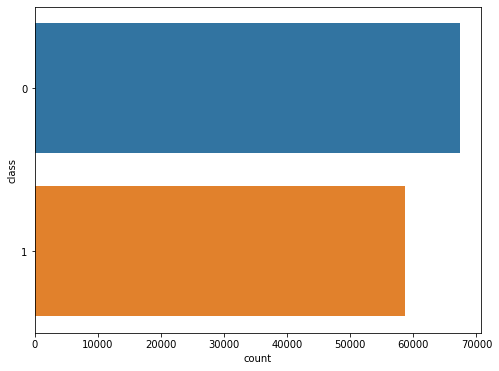

In [54]:
plt.figure(figsize=(8,6))
sns.countplot(y="class", data=data)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


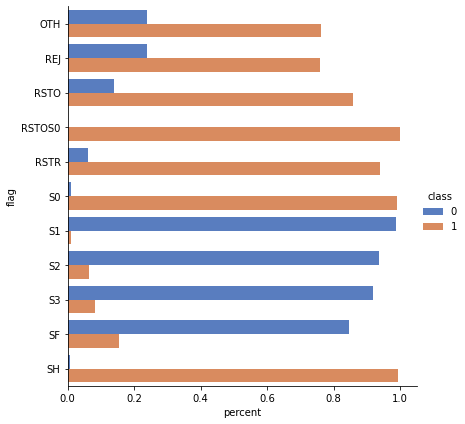

In [55]:
flag_count = data[['flag', 'class']].groupby(['flag', 'class']).size()
flag_count_percent = flag_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
flag_count_percent.columns = ['flag', 'class', 'percent']
sns.factorplot(y="flag",
            x = 'percent',
            hue="class",
            data = flag_count_percent,
            size=6,
            kind="bar",
            palette="muted")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


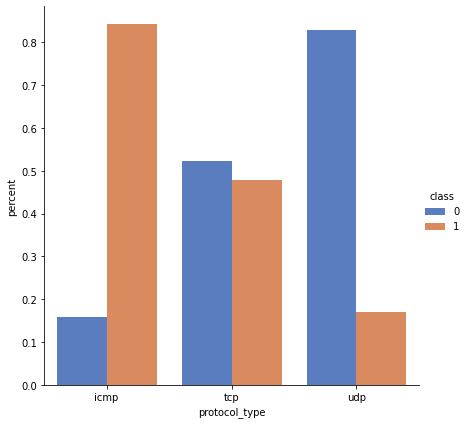

In [56]:
type_count = data[['protocol_type', 'class']].groupby(['protocol_type', 'class']).size()
type_count_percent = type_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
type_count_percent.columns = ['protocol_type', 'class', 'percent']
sns.factorplot(x="protocol_type",
            y = 'percent',
            hue="class",
            data = type_count_percent,
            size=6,
            kind="bar",
            palette="muted")

In [57]:
data.groupby('class').mean().T

class,0,1
duration,168.587396,423.320689
src_bytes,13133.279331,82820.141327
dst_bytes,4329.685223,37524.482159
land,0.000104,0.000307
wrong_fragment,0.000000,0.048746
urgent,0.000148,0.000068
hot,0.230655,0.174262
num_failed_logins,0.001381,0.001040
logged_in,0.710646,0.034027
num_compromised,0.507076,0.017568


**Checking Correlation between variables**

In [58]:
corrmat = data.corr()
corrmat

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064218,0.042679,0.052791,0.087183,0.045519,0.099116,-0.001593,0.070420,NaN,-0.000258,0.000440,-0.079042,-0.039470,-0.069873,-0.069510,0.200682,0.199961,0.074681,-0.013738,-0.040158,0.050570,-0.109776,-0.116005,0.254195,0.228737,-0.026669,-0.064948,-0.064361,0.173815,0.199024,0.048785
src_bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,-0.000272,-0.000186,-0.000093,-0.000179,-0.000134,-0.000309,NaN,-0.000022,-0.000742,-0.005152,-0.002792,-0.003228,-0.003438,0.013782,0.013975,0.003899,-0.000432,-0.002608,-0.005791,-0.006861,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449,0.005921
dst_bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,0.001069,0.001133,0.001229,0.000089,-0.000083,0.000339,NaN,-0.000008,-0.000421,-0.003543,-0.001754,-0.003059,-0.003038,0.011176,0.011052,0.003788,-0.001703,-0.001674,0.002528,-0.004224,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223,0.004118
land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,-0.000516,-0.000344,-0.000174,-0.000369,-0.000262,-0.000581,NaN,-0.000040,-0.001374,-0.009837,-0.005031,0.021734,0.022614,-0.004096,-0.005275,0.008739,-0.001551,0.038102,-0.025499,-0.014159,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303,0.007191
wrong_fragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072418,-0.001044,-0.003280,-0.002187,-0.001108,-0.002343,-0.001665,-0.003689,NaN,-0.000252,-0.008728,-0.020819,0.024457,-0.043316,-0.056549,-0.033052,-0.033507,0.054759,-0.026638,-0.026247,0.041056,-0.045240,-0.048733,0.059797,0.037177,-0.016252,-0.051917,-0.055917,0.028890,-0.033682,0.095905
urgent,0.003830,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,0.097507,0.007299,0.033329,0.075199,0.097710,0.032470,0.024918,-0.000144,0.010803,NaN,-0.000022,-0.000754,-0.005615,-0.002848,-0.004929,-0.004889,-0.002896,-0.002897,0.005967,-0.002705,-0.002898,-0.006941,-0.007897,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912,-0.002787
hot,0.000705,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,0.003715,0.116435,0.002014,0.015379,0.000130,0.001510,0.028716,0.004723,-0.001987,NaN,0.001043,0.860288,-0.068697,-0.034575,-0.059083,-0.058713,-0.032382,-0.031436,0.069365,-0.016212,-0.026781,-0.012249,-0.051864,-0.036293,-0.012293,-0.034536,-0.024715,-0.058222,-0.058214,-0.030555,-0.031670,-0.013083
num_failed_logins,0.009528,-0.000208,0.000504,-0.000381,-0.002418,0.097507,0.003715,1.000000,-0.006439,0.019085,0.032567,0.073175,0.018112,0.021774,-0.000503,0.000652,NaN,-0.000076,0.006446,-0.019544,-0.009880,-0.015254,-0.015899,0.022193,0.021870,0.019477,-0.004438,-0.010122,-0.025476,-0.023053,-0.001576,-0.001945,-0.005526,0.003302,-0.011648,-0.012299,0.018660,0.017359,-0.003755
logged_in,-0.064218,-0.003353,-0.002894,-0.011402,-0.072418,0.007299,0.116435,-0.006439,1.000000,0.014413,0.045290,0.030196,0.015304,0.032283,0.022996,0.050937,NaN,0.003482,0.119678,-0.539754,-0.199744,-0.491925,-0.490167,-0.287514,-0.283532,0.600536,-0.221323,0.131074,-0.401084,0.624365,0.604058,-0.256065,-0.160994,-0.055953,-0.491478,-0.493264,-0.275972,-0.272806,-0.690171
num_comp

1) Wrong fragments are present only in anomaly.

2) num_outboud_cmds are 0 for both anomaly and normal

3) connection duration is higher for anomaly

# LabelEncoder

In [0]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [60]:
categorical_columns = ['protocol_type','service','flag']
data_categorical_values = data[categorical_columns]
testdata_categorical_values = data_test[categorical_columns]
data_categorical_values.head()

data_categorical_values_enc = data_categorical_values.apply(LabelEncoder().fit_transform)
testdata_categorical_values_enc = testdata_categorical_values.apply(LabelEncoder().fit_transform)
print(data_categorical_values_enc.head())
print(testdata_categorical_values_enc.head())

   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9
   protocol_type  service  flag
0              1       45     1
1              1       45     1
2              1       19     9
3              0       13     9
4              1       55     2


# OneHotEncoder

In [61]:
unique_protocol = sorted(data.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2 = [string1 + x for x in unique_protocol]

unique_service = sorted(data.service.unique())
string2 = 'service_'
unique_service2 = [string2 + x for x in unique_service]

unique_flag = sorted(data.flag.unique())
string3 = 'flag_'
unique_flag2 = [string3 + x for x in unique_flag]

dumcols = unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

#test
unique_service_test=sorted(data_test.service.unique())
unique_service2_test=[ string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2
print('\n')
print(testdumcols)

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

In [62]:
enc = OneHotEncoder()
data_categorical_values_encenc = enc.fit_transform(data_categorical_values_enc)
data_cat_data = pd.DataFrame(data_categorical_values_encenc.toarray(),columns=dumcols)

testdata_categorical_values_encenc = enc.fit_transform(testdata_categorical_values_enc)
testdata_cat_data = pd.DataFrame(testdata_categorical_values_encenc.toarray(),columns=testdumcols)
data_cat_data.head()
#testdata_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,...,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
trainservice=data['service'].tolist()
testservice= data_test['service'].tolist()
difference = list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_red_i',
 'service_urh_i',
 'service_aol',
 'service_http_2784',
 'service_http_8001',
 'service_harvest']

In [0]:
data_cat_data = data_cat_data.sort_index(ascending=False, axis=1)

In [65]:
data_cat_data.head()

,service_whois,service_vmnet,service_uucp_path,service_uucp,service_urp_i,service_urh_i,service_time,service_tim_i,service_tftp_u,service_telnet,service_systat,service_supdup,service_sunrpc,service_ssh,service_sql_net,service_smtp,service_shell,service_rje,service_remote_job,service_red_i,service_private,service_printer,service_pop_3,service_pop_2,service_pm_dump,service_other,service_ntp_u,service_nntp,service_nnsp,service_netstat,service_netbios_ssn,service_netbios_ns,service_netbios_dgm,service_name,service_mtp,service_login,service_link,service_ldap,service_kshell,service_klogin,...,service_http_2784,service_http,service_hostnames,service_harvest,service_gopher,service_ftp_data,service_ftp,service_finger,service_exec,service_efs,service_ecr_i,service_eco_i,service_echo,service_domain_u,service_domain,service_discard,service_daytime,service_ctf,service_csnet_ns,service_courier,service_bgp,service_auth,service_aol,service_Z39_50,service_X11,service_IRC,flag_SH,flag_SF,flag_S3,flag_S2,flag_S1,flag_S0,flag_RSTR,flag_RSTOS0,flag_RSTO,flag_REJ,flag_OTH,Protocol_type_udp,Protocol_type_tcp,Protocol_type_icmp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [66]:
for col in difference:
    testdata_cat_data[col] = 0

testdata_cat_data.shape

(22544, 84)

In [0]:
testdata_cat_data = testdata_cat_data.sort_index(ascending=False, axis=1)

In [68]:
testdata_cat_data.head()

,service_whois,service_vmnet,service_uucp_path,service_uucp,service_urp_i,service_urh_i,service_time,service_tim_i,service_tftp_u,service_telnet,service_systat,service_supdup,service_sunrpc,service_ssh,service_sql_net,service_smtp,service_shell,service_rje,service_remote_job,service_red_i,service_private,service_printer,service_pop_3,service_pop_2,service_pm_dump,service_other,service_ntp_u,service_nntp,service_nnsp,service_netstat,service_netbios_ssn,service_netbios_ns,service_netbios_dgm,service_name,service_mtp,service_login,service_link,service_ldap,service_kshell,service_klogin,...,service_http_2784,service_http,service_hostnames,service_harvest,service_gopher,service_ftp_data,service_ftp,service_finger,service_exec,service_efs,service_ecr_i,service_eco_i,service_echo,service_domain_u,service_domain,service_discard,service_daytime,service_ctf,service_csnet_ns,service_courier,service_bgp,service_auth,service_aol,service_Z39_50,service_X11,service_IRC,flag_SH,flag_SF,flag_S3,flag_S2,flag_S1,flag_S0,flag_RSTR,flag_RSTOS0,flag_RSTO,flag_REJ,flag_OTH,Protocol_type_udp,Protocol_type_tcp,Protocol_type_icmp
0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [69]:
newdata = data.join(data_cat_data)
newdata.drop('protocol_type',axis=1,inplace=True)
newdata.drop('service',axis=1,inplace=True)
newdata.drop('flag',axis=1,inplace=True)
print(newdata.shape)

newdata_test = data_test.join(testdata_cat_data)
newdata_test.drop('protocol_type',axis=1,inplace=True)
newdata_test.drop('service',axis=1,inplace=True)
newdata_test.drop('flag',axis=1,inplace=True)
print(newdata_test.shape)

(125973, 123)
(22544, 123)


In [70]:
newdata.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,service_whois,...,service_http_2784,service_http,service_hostnames,service_harvest,service_gopher,service_ftp_data,service_ftp,service_finger,service_exec,service_efs,service_ecr_i,service_eco_i,service_echo,service_domain_u,service_domain,service_discard,service_daytime,service_ctf,service_csnet_ns,service_courier,service_bgp,service_auth,service_aol,service_Z39_50,service_X11,service_IRC,flag_SH,flag_SF,flag_S3,flag_S2,flag_S1,flag_S0,flag_RSTR,flag_RSTOS0,flag_RSTO,flag_REJ,flag_OTH,Protocol_type_udp,Protocol_type_tcp,Protocol_type_icmp
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [71]:
newdata_test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,service_whois,...,service_http_2784,service_http,service_hostnames,service_harvest,service_gopher,service_ftp_data,service_ftp,service_finger,service_exec,service_efs,service_ecr_i,service_eco_i,service_echo,service_domain_u,service_domain,service_discard,service_daytime,service_ctf,service_csnet_ns,service_courier,service_bgp,service_auth,service_aol,service_Z39_50,service_X11,service_IRC,flag_SH,flag_SF,flag_S3,flag_S2,flag_S1,flag_S0,flag_RSTR,flag_RSTOS0,flag_RSTO,flag_REJ,flag_OTH,Protocol_type_udp,Protocol_type_tcp,Protocol_type_icmp
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0,0.0,...,0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,1,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,1,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [0]:
newdata = newdata.drop_duplicates()
newdata_test = newdata_test.drop_duplicates()

In [73]:
print(newdata.shape)
print(newdata_test.shape)

(125964, 123)
(22541, 123)


In [74]:
corrm=newdata.corr()
corrm

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,service_whois,...,service_http_2784,service_http,service_hostnames,service_harvest,service_gopher,service_ftp_data,service_ftp,service_finger,service_exec,service_efs,service_ecr_i,service_eco_i,service_echo,service_domain_u,service_domain,service_discard,service_daytime,service_ctf,service_csnet_ns,service_courier,service_bgp,service_auth,service_aol,service_Z39_50,service_X11,service_IRC,flag_SH,flag_SF,flag_S3,flag_S2,flag_S1,flag_S0,flag_RSTR,flag_RSTOS0,flag_RSTO,flag_REJ,flag_OTH,Protocol_type_udp,Protocol_type_tcp,Protocol_type_icmp
duration,1.000000,0.070737,0.034878,-0.001553,-0.009867,0.003830,0.000704,0.009528,-0.064226,0.042679,0.052791,0.087183,0.045519,0.099116,-0.001594,0.070420,NaN,-0.000258,0.000439,-0.079050,-0.039473,-0.069879,-0.069516,0.200680,0.199959,0.074688,-0.013740,-0.040157,0.050562,-0.109788,-0.116001,0.254194,0.228821,-0.026672,-0.064954,-0.064366,0.173813,0.199022,0.048796,-0.006473,...,-0.000311,-0.075240,-0.004626,-0.000439,-0.005115,-0.021700,-0.001823,-0.012482,-0.005232,-0.005337,-0.017432,-0.021421,-0.002250,-0.029670,-0.005530,-0.003436,-0.003298,-0.005515,-0.005389,-0.007215,-0.006721,-0.008206,-0.000439,-0.007745,0.003741,0.093194,-0.005119,-0.068250,0.001148,-0.003411,-0.005944,-0.068188,0.539953,0.034268,-0.005337,-0.034496,-0.002107,0.027972,-0.004660,-0.029249
src_bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,-0.000272,-0.000186,-0.000093,-0.000179,-0.000134,-0.000309,NaN,-0.000022,-0.000742,-0.005153,-0.002793,-0.003229,-0.003439,0.013782,0.013975,0.003899,-0.000432,-0.002608,-0.005793,-0.006861,-0.006572,0.000900,0.000433,-0.001655,-0.004503,-0.003397,-0.001468,0.012449,0.005922,-0.000577,...,-0.000022,-0.005152,-0.000470,-0.000031,-0.000499,0.003377,0.015016,0.007047,-0.000477,-0.000483,-0.001204,-0.001508,-0.000456,-0.002157,-0.000523,0.012381,-0.000500,-0.000520,-0.000512,-0.000594,-0.000584,-0.000678,-0.000031,-0.000644,0.014492,-0.000271,-0.000360,-0.006079,0.000682,-0.000229,0.000007,-0.004801,-0.000685,0.178046,0.007609,-0.002429,-0.000148,-0.002849,0.003682,-0.002044
dst_bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002895,0.001233,0.001069,0.001133,0.001229,0.000089,-0.000083,0.000339,NaN,-0.000008,-0.000421,-0.003543,-0.001755,-0.003059,-0.003038,0.011176,0.011052,0.003788,-0.001703,-0.001674,0.002527,-0.004224,-0.004423,0.011031,0.011751,-0.001281,-0.003024,-0.002944,0.011729,0.011223,0.004118,-0.000366,...,-0.000014,-0.002607,-0.000298,-0.000020,-0.000316,-0.000260,-0.000536,-0.000585,-0.000302,-0.000306,-0.000778,-0.000956,-0.000289,-0.001362,-0.000330,-0.000322,-0.000317,-0.000330,-0.000324,-0.000377,-0.000370,-0.000430,-0.000020,-0.000408,0.001357,-0.000103,-0.000228,-0.004509,-0.000077,0.000215,0.000147,-0.003042,0.029685,-0.000141,-0.000537,-0.001539,-0.000085,-0.001802,0.002336,-0.001305
land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011403,-0.000164,-0.000516,-0.000344,-0.000175,-0.000369,-0.000262,-0.000581,NaN,-0.000040,-0.001374,-0.009837,-0.005031,0.021734,0.022614,-0.004096,-0.005276,0.008739,-0.001552,0.038108,-0.025504,-0.014160,0.011599,-0.004516,0.033863,0.070474,0.019840,0.012275,-0.005223,-0.005303,0.007192,-0.001048,...,-0.000040,-0.009670,-0.000853,-0.000056,-0.000905,-0.003381,-0.001674,0.113329,-0.000866,-0.000876,-0.002228,-0.002737,-0.000828

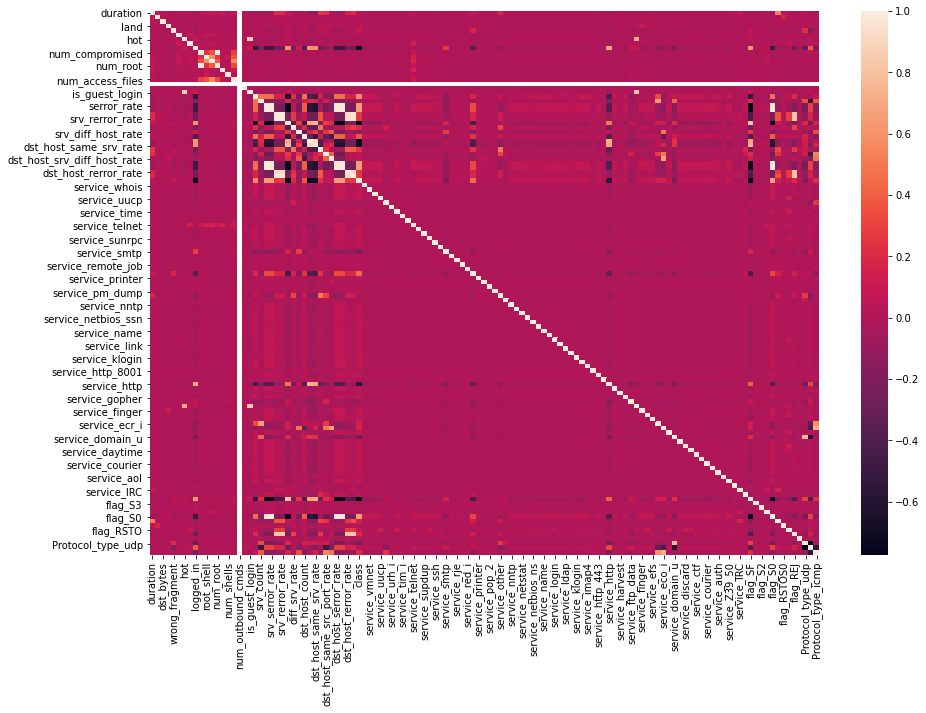

In [75]:
%matplotlib inline
plt.figure(figsize = (15, 10))
sns.heatmap(corrm)

In [0]:
newdata.drop(columns=["num_outbound_cmds"],inplace=True)
newdata_test.drop(columns=["num_outbound_cmds"],inplace=True)

In [0]:
# X_data = newdata.drop("class",axis=1)
# y_data = newdata["class"]

# X_data_test = newdata_test.drop("class",axis=1)
# y_data_test = newdata_test["class"]

In [78]:
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
X = newdata[newdata.columns.difference(['class'])]
dectree = DecisionTreeClassifier()
rfe = RFE(dectree, 15)
rfe = rfe.fit(X, newdata['class'] )
print(rfe.support_)
print(rfe.ranking_)

[False False False False False  True  True False  True False  True False
  True  True False  True  True False False False False False False False
 False False False False  True False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False  True False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False]
[107   5  54   4  16   1   1   2   1   3   1  22   1   1  37   1   1  25
  17   9  49  33  57   6  30  76  36  77   1  39  90  59   1  88  86  32
  28  21  20  38  65  48   8  42  15  80  81  12  92  94  96  98  99 101
  43  29  72  82   1 104 106  10  41   1  3

In [79]:
# capturing the important variables
RFE_features=X.columns[rfe.get_support()]
print(RFE_features)
all_columns = "+".join(newdata.columns.difference( ['newdata'] ))
print (all_columns)

Index(['dst_bytes', 'dst_host_count', 'dst_host_rerror_rate',
       'dst_host_same_srv_rate', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'dst_host_srv_serror_rate', 'duration',
       'hot', 'logged_in', 'service_ecr_i', 'service_ftp_data', 'service_http',
       'service_private', 'src_bytes'],
      dtype='object')
Protocol_type_icmp+Protocol_type_tcp+Protocol_type_udp+class+count+diff_srv_rate+dst_bytes+dst_host_count+dst_host_diff_srv_rate+dst_host_rerror_rate+dst_host_same_src_port_rate+dst_host_same_srv_rate+dst_host_serror_rate+dst_host_srv_count+dst_host_srv_diff_host_rate+dst_host_srv_rerror_rate+dst_host_srv_serror_rate+duration+flag_OTH+flag_REJ+flag_RSTO+flag_RSTOS0+flag_RSTR+flag_S0+flag_S1+flag_S2+flag_S3+flag_SF+flag_SH+hot+is_guest_login+is_host_login+land+logged_in+num_access_files+num_compromised+num_failed_logins+num_file_creations+num_root+num_shells+rerror_rate+root_shell+same_srv_rate+serror_rate+service_IRC+service_X11+service_Z39_50+service_aol

In [80]:
newdata["class"].head()

0    0
1    0
2    1
3    0
4    0
Name: class, dtype: int64

**Variance Inflation Factor Assessment**

In [0]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from patsy import dmatrices

# a, b = dmatrices(formula_like='''Protocol_type_icmp+Protocol_type_tcp+Protocol_type_udp+
#                   count+diff_srv_rate+dst_bytes+dst_host_count+dst_host_diff_srv_rate+
#                   dst_host_rerror_rate+dst_host_same_src_port_rate+dst_host_same_srv_rate+
#                   dst_host_serror_rate+dst_host_srv_count+dst_host_srv_diff_host_rate+
#                   dst_host_srv_rerror_rate+dst_host_srv_serror_rate+duration+flag_OTH+
#                   flag_REJ+flag_RSTO+flag_RSTOS0+flag_RSTR+flag_S0+flag_S1+flag_S2+flag_S3+flag_SF+flag_SH+
#                   hot+is_guest_login+is_host_login+land+logged_in+num_access_files+num_compromised+
#                   num_failed_logins+num_file_creations+num_root+num_shells+rerror_rate+root_shell+same_srv_rate+serror_rate+service_IRC+service_X11+service_Z39_50+service_aol+service_auth+service_bgp+service_courier+service_csnet_ns+service_ctf+service_daytime+service_discard+service_domain+service_domain_u+service_echo+service_eco_i+service_ecr_i+service_efs+service_exec+service_finger+service_ftp+service_ftp_data+service_gopher+service_harvest+service_hostnames+service_http+service_http_2784+service_http_443+service_http_8001+service_imap4+service_iso_tsap+service_klogin+service_kshell+service_ldap+service_link+service_login+service_mtp+service_name+service_netbios_dgm+service_netbios_ns+service_netbios_ssn+service_netstat+service_nnsp+service_nntp+service_ntp_u+service_other+service_pm_dump+service_pop_2+service_pop_3+service_printer+service_private+service_red_i+service_remote_job+service_rje+service_shell+service_smtp+service_sql_net+service_ssh+service_sunrpc+service_supdup+service_systat+service_telnet+service_tftp_u+service_tim_i+service_time+service_urh_i+service_urp_i+service_uucp+service_uucp_path+service_vmnet+service_whois+src_bytes+srv_count+
#                   srv_diff_host_rate+srv_rerror_rate+srv_serror_rate+
#                   su_attempted+urgent+wrong_fragment''', data=newdata, return_type = 'dataframe')

# # get the VIF
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
# vif["features"] = b.columns

# vif

In [0]:
cols=['count','diff_srv_rate','dst_bytes','dst_host_count',
                 'dst_host_diff_srv_rate','dst_host_same_src_port_rate',
                 'dst_host_srv_diff_host_rate','duration',
                 'hot' ,'logged_in','num_compromised',
                 'srv_count','srv_diff_host_rate']

In [0]:
# X_data=newdata[cols]
y_data=newdata['class']
# X_data_test=newdata_test[cols]
y_data_test=newdata_test['class']

In [83]:
print(newdata.std(axis=0))

duration              2.604607e+03
src_bytes             5.870541e+06
dst_bytes             4.021413e+06
land                  1.408657e-02
wrong_fragment        2.535390e-01
                          ...     
flag_REJ              2.849991e-01
flag_OTH              1.910637e-02
Protocol_type_udp     3.238205e-01
Protocol_type_tcp     3.881165e-01
Protocol_type_icmp    2.478437e-01
Length: 122, dtype: float64


In [0]:
X_data = newdata.drop("class",axis=1)

In [0]:
X_data_test = newdata_test.drop("class",axis=1)

In [87]:
X_data_test.shape

(22541, 121)

In [88]:
print(y_data_test.head())

0    1
1    1
2    0
3    1
4    1
Name: class, dtype: int64


In [0]:
from sklearn.preprocessing import StandardScaler
scaler_train = StandardScaler()
scaler_train.fit(X_data)
X_train = scaler_train.transform(X_data)

In [90]:
print(X_train.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


In [0]:
scaler_test = StandardScaler()
scaler_test.fit(X_data_test)
X_test = scaler_test.transform(X_data_test)

In [92]:
print(X_test.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


In [0]:
# data_test = pd.DataFrame(data=X_data_test,columns=colNames_test)

In [0]:
# newdata_test = data_test.join(testdata_cat_data)

In [95]:
X_data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,service_whois,service_vmnet,service_uucp_path,...,service_http_2784,service_http,service_hostnames,service_harvest,service_gopher,service_ftp_data,service_ftp,service_finger,service_exec,service_efs,service_ecr_i,service_eco_i,service_echo,service_domain_u,service_domain,service_discard,service_daytime,service_ctf,service_csnet_ns,service_courier,service_bgp,service_auth,service_aol,service_Z39_50,service_X11,service_IRC,flag_SH,flag_SF,flag_S3,flag_S2,flag_S1,flag_S0,flag_RSTR,flag_RSTOS0,flag_RSTO,flag_REJ,flag_OTH,Protocol_type_udp,Protocol_type_tcp,Protocol_type_icmp
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [96]:
X_data_test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,service_whois,service_vmnet,service_uucp_path,...,service_http_2784,service_http,service_hostnames,service_harvest,service_gopher,service_ftp_data,service_ftp,service_finger,service_exec,service_efs,service_ecr_i,service_eco_i,service_echo,service_domain_u,service_domain,service_discard,service_daytime,service_ctf,service_csnet_ns,service_courier,service_bgp,service_auth,service_aol,service_Z39_50,service_X11,service_IRC,flag_SH,flag_SF,flag_S3,flag_S2,flag_S1,flag_S0,flag_RSTR,flag_RSTOS0,flag_RSTO,flag_REJ,flag_OTH,Protocol_type_udp,Protocol_type_tcp,Protocol_type_icmp
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [97]:
y_data

0         0
1         0
2         1
3         0
4         0
         ..
125968    1
125969    0
125970    0
125971    1
125972    0
Name: class, Length: 125964, dtype: int64

In [0]:
import numpy as np
y_train = np.array(y_data)

In [99]:
y_train

array([0, 0, 1, ..., 0, 1, 0])

In [0]:
y_test = np.array(y_data_test)

In [101]:
y_test

array([1, 1, 0, ..., 1, 0, 1])

In [102]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(125964, 121)
(22541, 121)
(125964,)
(22541,)


In [103]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Building Model

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [0]:
import numpy as np
y_train = np.array(y_data)
y_test = np.array(y_data_test)

In [0]:
batch_size = 128
print(X_train.shape)
print(X_test.shape)

(125964, 1, 121)
(22541, 1, 121)


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import SimpleRNN,GRU,LSTM

In [0]:
model = Sequential()
model.add(SimpleRNN(80,input_dim=121, return_sequences=True))
model.add(Dropout(0.7))
model.add(SimpleRNN(80, return_sequences=False))
model.add(Dropout(0.7))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [0]:
from keras.optimizers import SGD
kd = SGD(learning_rate=0.5)

In [0]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=batch_size, epochs=100, validation_data=(X_test, y_test))

In [0]:
loss, accuracy = model.evaluate(X_test, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

22541/22541 [==============================] - 1s 28us/step

Loss: 1.01, Accuracy: 80.28%


In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test,model.predict_classes(X_test)))

[[8868  843]
 [3602 9228]]


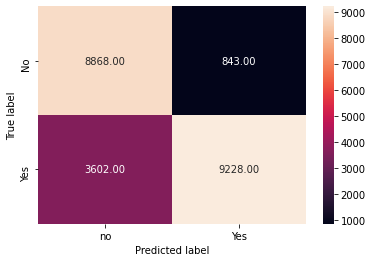

In [0]:
nb_cm = confusion_matrix(y_test,model.predict_classes(X_test))
sns.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [0]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

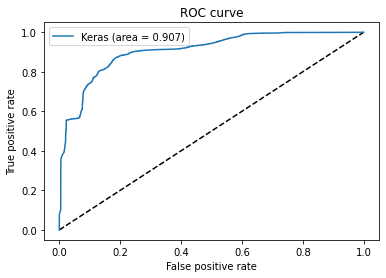

In [0]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='SimpleRNN (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [0]:
X_train = X_train.reshape(125964,121)
X_test = X_test.reshape(22541,121)

# Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
tree.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=26, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_predtree = clf_tree.predict(X_test)

In [0]:
print("Accuracy Score: ",accuracy_score(y_test,y_predtree)*100)

Accuracy Score:  81.85528592342843


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predtree)

array([[ 6825,  2886],
       [ 1204, 11626]])

In [0]:
print(X_train.shape)

(125964, 121)


# RandomForest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [0]:
clff = RandomForestClassifier()

In [0]:
clff.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_predforest = clff.predict(X_test)

In [0]:
print("Accuracy Score: ",accuracy_score(y_test,y_predforest))

Accuracy Score:  0.7646510802537598


In [0]:
print(confusion_matrix(y_data_test,y_predforest))

[[8767  944]
 [4361 8469]]


# AdaBoost Classifier

In [0]:
from sklearn.ensemble import AdaBoostClassifier

In [0]:
adaboost = AdaBoostClassifier()

In [0]:
adaboost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [0]:
y_predadaboost = adaboost.predict(X_data_test)

In [0]:
print("Accuracy Score: ",accuracy_score(y_data_test,y_predadaboost))

Accuracy Score:  0.8412670245330731


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_data_test, y_predadaboost)

array([[ 6630,  3081],
       [  497, 12333]])

# SVM Classifier

1. Linear SVM

In [0]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [105]:
svm_clf = LinearSVC(random_state=0, tol=1e-5)
svm_clf.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

In [106]:
print(svm_clf.coef_)
print(svm_clf.intercept_)

[[-1.58125284e-02  2.90736061e-01  6.74141894e-01 -3.22339270e-02
   3.74533999e-01  9.06327000e-03  1.99681210e-01  4.12048114e-02
   1.30723927e-01  6.57474230e+00  1.06131058e-02 -7.82968691e-02
  -6.92019769e+00 -3.85920907e-02 -5.96405020e-03 -3.38220077e-02
  -2.13063335e-03 -1.34532002e-01  5.83205716e-01 -1.79426241e-01
  -1.78788611e-01  7.71314997e-01  1.80854544e-01  4.52589783e-01
  -1.83370486e-01 -5.23385338e-02  9.50705700e-02  2.15625382e-01
  -4.16050649e-01  1.78160660e-01  6.41355999e-02  2.63555652e-01
   1.01809199e-01 -6.99210434e-03  3.83700766e-01  2.01074875e-01
  -2.62387514e-02  1.43232239e-01  3.56737889e-02  4.03402437e-02
   1.71331614e-01 -7.69760030e-02 -6.95245966e-03 -5.96837757e-02
   5.34852542e-03 -3.69039452e-03 -2.04558858e-01  8.12909995e-02
   1.10215814e-01 -2.92746402e-02  7.27364004e-03  3.28982859e-02
  -2.59037761e-01 -2.00489022e-02  3.94293001e-02  3.71246376e-02
  -6.02650863e-03  3.97437990e-01 -9.67837356e-03 -5.07116024e-02
   2.78412

In [109]:
print(svm_clf.predict(X_train))
print(accuracy_score(y_test,svm_clf.predict(X_test)))

[0 0 1 ... 0 1 0]
0.7883856084468303


2. Kernel SVM ( rbf kernel )

In [0]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

classifier = SVC(kernel='rbf', class_weight='balanced',gamma='scale')

In [111]:
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
yfit = classifier.predict(X_test)

In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81      9711
           1       0.92      0.74      0.82     12830

    accuracy                           0.82     22541
   macro avg       0.82      0.83      0.82     22541
weighted avg       0.84      0.82      0.82     22541



Text(91.68, 0.5, 'predicted label')

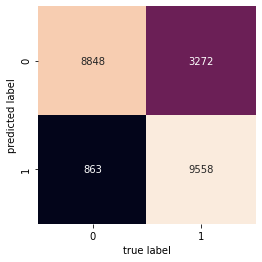

In [115]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [117]:
print("Accuracy:",accuracy_score(y_test,classifier.predict(X_test))*100)

Accuracy: 81.65564970498204


# Comparison of classifiers

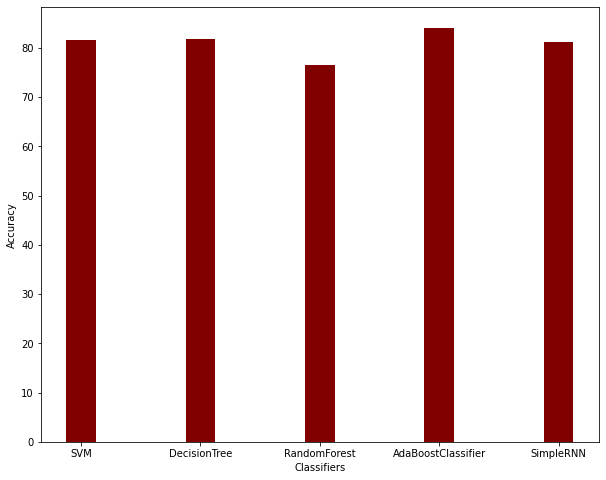

In [67]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10, 8))
plt.yticks(np.arange(0,100,step=10))
classifier = ['SVM', 'DecisionTree', 'RandomForest', 'AdaBoostClassifier', 'SimpleRNN']
accuracy = [ 81.65, 81.85, 76.46, 84.12, 81.11]
plt.bar(classifier,accuracy,width=0.25,color="maroon")
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.show()